DATASET Link:

https://www.kaggle.com/datasets/atakanak/turkish-house-rent-prediction-dataset/data

In [325]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [326]:
dataset = pd.read_csv("Dataset_TR/dataset_combined.csv")

In [327]:
dataset.shape

(8808, 16)

In [328]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8808.0,4403.500000,2542.794919,0.0,2201.75,4403.5,6605.25,8807.0
Bathroom Count,8805.0,1.395798,0.794235,1.0,1.00,1.0,2.00,22.0
Price,8808.0,65536.602066,672055.265326,1.0,14000.00,20000.0,30000.00,40000000.0


In [329]:
dataset.head()

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,3 + 1,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,3 + 1,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,360 m2,4 + 1,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,350 m2,4 + 1,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,1 + 1,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000


In [330]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8808 non-null   int64  
 1   City            8808 non-null   object 
 2   Town            8808 non-null   object 
 3   Neighborhood    8808 non-null   object 
 4   Apartment Type  8808 non-null   object 
 5   House Type      8808 non-null   object 
 6   House Age       8808 non-null   object 
 7   House Size      8808 non-null   object 
 8   Room Count      8808 non-null   object 
 9   Floor           8202 non-null   object 
 10  Furniture       8460 non-null   object 
 11  Bathroom Count  8805 non-null   float64
 12  Hand            7047 non-null   object 
 13  Heater Type     8807 non-null   object 
 14  Heater Fuel     7217 non-null   object 
 15  Price           8808 non-null   int64  
dtypes: float64(1), int64(2), object(13)
memory usage: 1.1+ MB


In [331]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8808.0,4403.500000,2542.794919,0.0,2201.75,4403.5,6605.25,8807.0
Bathroom Count,8805.0,1.395798,0.794235,1.0,1.00,1.0,2.00,22.0
Price,8808.0,65536.602066,672055.265326,1.0,14000.00,20000.0,30000.00,40000000.0


In [332]:
dataset.isnull().sum()

Unnamed: 0           0
City                 0
Town                 0
Neighborhood         0
Apartment Type       0
House Type           0
House Age            0
House Size           0
Room Count           0
Floor              606
Furniture          348
Bathroom Count       3
Hand              1761
Heater Type          1
Heater Fuel       1591
Price                0
dtype: int64

In [333]:
dataset.columns

Index(['Unnamed: 0', 'City', 'Town', 'Neighborhood', 'Apartment Type',
       'House Type', 'House Age', 'House Size', 'Room Count', 'Floor',
       'Furniture', 'Bathroom Count', 'Hand', 'Heater Type', 'Heater Fuel',
       'Price'],
      dtype='object')

In [334]:
for column in dataset.columns:
    print(column)
    print(pd.unique(dataset[column]))
    print("\n====================\n")

Unnamed: 0
[   0    1    2 ... 8805 8806 8807]


City
['Ankara' 'Adana' 'İstanbul' 'Muğla' 'Antalya' 'İzmir' 'Isparta' 'Aksaray'
 'Balıkesir' 'Tekirdağ' 'Edirne' 'Tokat' 'Bursa' 'Kocaeli' 'Aydın'
 'Erzincan' 'Burdur' 'Çanakkale' 'Yalova' 'Zonguldak' 'Kayseri' 'Giresun'
 'Eskişehir' 'Bolu' 'Düzce' 'Kastamonu' 'Amasya' 'Kahramanmaraş' 'Çorum'
 'Mersin(İçel)' 'Erzurum' 'Hatay' 'Samsun' 'Denizli' 'Manisa' 'Batman'
 'Bartın' 'Ordu' 'Gaziantep' 'Sakarya' 'Sivas' 'Kırıkkale' 'Kütahya'
 'Uşak' 'Nevşehir' 'Niğde' 'Osmaniye' 'Sinop' 'Rize' 'Trabzon' 'Konya'
 'Diyarbakır' 'Kırklareli' 'Karaman' 'Elazığ' 'Bilecik' 'Karabük' 'Mardin'
 'Van' 'Yozgat' 'Muş' 'Afyonkarahisar' 'K.K.T.C.' 'Kilis' 'Şanlıurfa'
 'Artvin' 'Malatya' 'Kırşehir' 'Adıyaman' 'Ağrı' 'Hakkari' 'Bitlis'
 'Çankırı' 'Bayburt']


Town
['Mamak' 'Seyhan' 'Beşiktaş' 'Şişli' 'Bodrum' 'Alanya' 'Bahçelievler'
 'Seferihisar' 'Çeşme' 'Serik' 'Etimesgut' 'Ortaca' 'Kadıköy' 'Sarıyer'
 'Çankaya' 'Beyoğlu' 'Avcılar' 'Merkez' 'Küçükçekmece' 'Erdek'

In [335]:
pd.unique(dataset["City"])

array(['Ankara', 'Adana', 'İstanbul', 'Muğla', 'Antalya', 'İzmir',
       'Isparta', 'Aksaray', 'Balıkesir', 'Tekirdağ', 'Edirne', 'Tokat',
       'Bursa', 'Kocaeli', 'Aydın', 'Erzincan', 'Burdur', 'Çanakkale',
       'Yalova', 'Zonguldak', 'Kayseri', 'Giresun', 'Eskişehir', 'Bolu',
       'Düzce', 'Kastamonu', 'Amasya', 'Kahramanmaraş', 'Çorum',
       'Mersin(İçel)', 'Erzurum', 'Hatay', 'Samsun', 'Denizli', 'Manisa',
       'Batman', 'Bartın', 'Ordu', 'Gaziantep', 'Sakarya', 'Sivas',
       'Kırıkkale', 'Kütahya', 'Uşak', 'Nevşehir', 'Niğde', 'Osmaniye',
       'Sinop', 'Rize', 'Trabzon', 'Konya', 'Diyarbakır', 'Kırklareli',
       'Karaman', 'Elazığ', 'Bilecik', 'Karabük', 'Mardin', 'Van',
       'Yozgat', 'Muş', 'Afyonkarahisar', 'K.K.T.C.', 'Kilis',
       'Şanlıurfa', 'Artvin', 'Malatya', 'Kırşehir', 'Adıyaman', 'Ağrı',
       'Hakkari', 'Bitlis', 'Çankırı', 'Bayburt'], dtype=object)

## Fix Room Count

In [336]:
pd.unique(dataset["Room Count"])

array(['3 + 1', '4 + 1', '1 + 1', '2 + 1', '5 + 1', '5 + 2', '7 + 1',
       '6 + 1', '8 + 1', '6 + 2', '10 + 2', '8 + 2', '3 + 2', '7 + 2',
       '4 + 2', '1 + 0', '2 + 0', '2 + 2', '6 + 3', '11 + 2', '9 + 3',
       '6 + 6', '6 + 0', '9 + 1', '25 + 2', '4 + 8', '1 + 3', '3 + 3',
       '3 + 0', '4 + 4', '5 + 3', '1 + 2', '41 + 1', '9 + 2', '10 + 1',
       '11 + 1', '4 + 0', '22 + 2', '4 + 3', '10 + 4', '11 + 3',
       '18 + 18'], dtype=object)

In [337]:
room_counts = dataset["Room Count"].value_counts()
room_counts

3 + 1      3058
2 + 1      2957
1 + 1      1523
4 + 1       658
5 + 1       161
1 + 0        87
4 + 2        71
5 + 2        65
3 + 2        49
6 + 1        42
2 + 0        32
6 + 2        19
2 + 2        14
7 + 1        13
7 + 2        11
5 + 3         6
8 + 1         5
3 + 3         4
3 + 0         3
9 + 1         2
9 + 2         2
1 + 2         2
6 + 6         2
6 + 0         2
6 + 3         2
8 + 2         2
10 + 1        1
11 + 3        1
10 + 4        1
4 + 3         1
22 + 2        1
4 + 0         1
11 + 1        1
41 + 1        1
10 + 2        1
25 + 2        1
4 + 4         1
11 + 2        1
9 + 3         1
1 + 3         1
4 + 8         1
18 + 18       1
Name: Room Count, dtype: int64

In [338]:
valid_rooms = room_counts[room_counts >= 10].index
filtered_df = dataset[dataset["Room Count"].isin(valid_rooms)]

In [339]:
filtered_df.shape

(8760, 16)

In [340]:
filtered_df["Room Count"].value_counts()

3 + 1    3058
2 + 1    2957
1 + 1    1523
4 + 1     658
5 + 1     161
1 + 0      87
4 + 2      71
5 + 2      65
3 + 2      49
6 + 1      42
2 + 0      32
6 + 2      19
2 + 2      14
7 + 1      13
7 + 2      11
Name: Room Count, dtype: int64

In [341]:
filtered_df[["Rooms", "Living Rooms"]] = filtered_df["Room Count"].str.split(r"\s*\+\s*", expand=True)

c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [342]:
filtered_df.shape

(8760, 18)

In [343]:
filtered_df[["Room Count","Rooms","Living Rooms"]]

,Room Count,Rooms,Living Rooms
0,3 + 1,3,1
1,3 + 1,3,1
2,4 + 1,4,1
3,4 + 1,4,1
4,1 + 1,1,1
...,...,...,...
8803,1 + 1,1,1
8804,2 + 1,2,1
8805,3 + 1,3,1
8806,3 + 1,3,1


In [344]:
filtered_df["Rooms"] = filtered_df["Rooms"].astype(int)
filtered_df["Living Rooms"] = filtered_df["Living Rooms"].astype(int)
filtered_df.drop(columns=["Room Count"], inplace=True)

c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set o

In [345]:
filtered_df.shape

(8760, 17)

In [346]:
filtered_df

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,House Size,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,125 m2,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,140 m2,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,360 m2,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,Sıfır,350 m2,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,90 m2,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,8803,Konya,Ereğli,Toros,Daire,Daire,5,65 m2,Ara Kat,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1
8804,8804,Antalya,Alanya,Mahmutlar,Daire,Daire,15,130 m2,2. Kat,False,1.0,NaN,Klima,Elektrik,13000,2,1
8805,8805,Isparta,Merkez,Çünür,Daire,Daire,5,150 m2,En Üst Kat,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1
8806,8806,Kocaeli,Darıca,Nenehatun,Daire,Daire,1,173 m2,En Üst Kat,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1


## 1-Analyze House Age

In [347]:
pd.unique(filtered_df["House Age"])

array(['3', '5', 'Sıfır', '15', '10', '21', '1', '27', '25', '11', '22',
       '2', '4', '30', '26', '24', '55', '35', '9', '14', '40', '31',
       '20', '8', '6', '18', '12', '7', '39', '13', '45', '17', '50',
       '16', '36', '100', '75', '19', '43', '28', '37', '33', '38', '69',
       '42', '32', '29', '60', '34', '23', '48', '70', '52', '200', '80',
       '220', '95', '46', '65', '49', '115', '273', '90', '74', '44',
       '150'], dtype=object)

In [348]:
filtered_df["House Age"].value_counts()

Sıfır    995
5        651
25       601
30       584
15       496
        ... 
49         1
95         1
220        1
200        1
150        1
Name: House Age, Length: 66, dtype: int64

In [349]:
filtered_df.groupby("House Age").agg(
    Mean_Price=("Price", "mean"),
    House_Count=("Price", "count")
).sort_values("House_Count", ascending=False)


,Mean_Price,House_Count
House Age,,
Sıfır,56248.968844,995
5,54267.196621,651
25,31695.008319,601
30,90231.849315,584
15,45768.830645,496
...,...,...
80,42000.000000,1
150,16500.000000,1
90,40000.000000,1


In [350]:
def clean_house_age(value):
    if value == "Sıfır":
        return 0
    try:
        return int(value)
    except:
        return None  # veya np.nan

filtered_df["House Age"] = filtered_df["House Age"].apply(clean_house_age)


c:\Users\Giray\Projects\Rent_Estimation_System\tensorflow_env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [351]:
filtered_df.groupby("House Age").agg(
    Mean_Price=("Price", "mean"),
    House_Count=("Price", "count")
).sort_values("House_Count", ascending=False)

,Mean_Price,House_Count
House Age,,
0,56248.968844,995
5,54267.196621,651
25,31695.008319,601
30,90231.849315,584
15,45768.830645,496
...,...,...
90,40000.000000,1
80,42000.000000,1
74,35000.000000,1


In [352]:
age_counts = filtered_df["House Age"].value_counts()
valid_ages = age_counts[age_counts >= 10].index

filtered_df = filtered_df[filtered_df["House Age"].isin(valid_ages)]

In [353]:
filtered_df.groupby("House Age").agg(
    Mean_Price=("Price", "mean"),
    House_Count=("Price", "count")
).sort_values("House_Count", ascending=False)

,Mean_Price,House_Count
House Age,,
0,56248.968844,995
5,54267.196621,651
25,31695.008319,601
30,90231.849315,584
15,45768.830645,496
20,127123.445585,487
10,54265.989384,471
4,74603.103550,338
35,31322.005988,334


## 2-Analyze House m2 Size

In [354]:
filtered_df["House Size"].value_counts()

120 m2    502
100 m2    502
110 m2    481
130 m2    448
90 m2     438
         ... 
386 m2      1
22 m2       1
279 m2      1
459 m2      1
173 m2      1
Name: House Size, Length: 275, dtype: int64

In [355]:
non_numeric_sizes = filtered_df[~filtered_df["House Size"].str.contains(r"\d", na=False)]


In [356]:
print("Non-numeric Data count:", len(non_numeric_sizes)) # Removing rows like "Kat Karşılığı :"

Non-numeric Data count: 9


In [357]:
filtered_df = filtered_df[filtered_df["House Size"].str.contains(r"\d", na=False)]


In [358]:
non_numeric_sizes = filtered_df[~filtered_df["House Size"].str.contains(r"\d", na=False)]
print("Non-numeric Data count:", len(non_numeric_sizes))

Non-numeric Data count: 0


In [359]:
def extract_m2(value):
    try:
        return float(value.replace(" m2", "").replace(".", ""))
    except:
        return None

filtered_df["House Size m2"] = filtered_df["House Size"].apply(extract_m2)
filtered_df.drop(columns=["House Size"], inplace=True)


In [360]:
filtered_df.shape

(8701, 17)

In [361]:
filtered_df.head()

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,360.0
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,350.0
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1,90.0


## 3-Analyze Floor

In [362]:
filtered_df["Floor"].value_counts(dropna=False)

2. Kat             1168
3. Kat             1007
1. Kat              976
Ara Kat             771
4. Kat              692
NaN                 578
Yüksek Giriş        570
5. Kat              398
Bahçe Katı          384
En Üst Kat          347
Giriş Katı          278
6. Kat              191
7. Kat              167
Kot 1               142
8. Kat              137
21 ve üzeri          98
Çatı Katı            93
9. Kat               84
Zemin                81
10. Kat              65
11. Kat              58
Villa Katı           50
12. Kat              45
14. Kat              43
13. Kat              42
Teras Katı           41
Kot 2                39
Yarı Bodrum          29
Kot 3                24
15. Kat              21
18. Kat              15
16. Kat              15
20. Kat              13
17. Kat              13
19. Kat              11
Bodrum                9
Bodrum ve Zemin       3
Tripleks              2
Asma Kat              1
Name: Floor, dtype: int64

In [363]:
def convert_floor(value):
    try:
        # ("2. Kat" → 2)
        if ". Kat" in value:
            return int(value.replace(". Kat", "").strip())
        
        # Special Floors:
        elif value == "Giriş Katı":
            return 0
        elif value == "Zemin":
            return 0
        elif value == "Bahçe Katı":
            return 0
        elif value == "Yüksek Giriş":
            return 0.5
        elif value == "Ara Kat":
            return 2.5  # Uncertain, can be any floor between (0,top). But there are sufficient amount of data.
        elif value == "En Üst Kat":
            return 20
        elif value == "Çatı Katı":
            return 20
        elif value == "Teras Katı":
            return 20
        elif value == "Bodrum":
            return -2
        elif value == "Yarı Bodrum":
            return -2
        elif value == "Bodrum ve Zemin":
            return -2
        elif value == "Villa Katı":
            return 1.5 # 1-2 floored
        elif "Kot" in value:
            return -1 * int(value.replace("Kot ", "").strip())
        elif "ve üzeri" in value:
            return 21
        else:
            return 2.75  # Unsufficient amount of data: Tripleks, Villa Katı, etc.
    
    except:
        return 2.5


In [364]:
filtered_df["Floor Level"] = filtered_df["Floor"].apply(convert_floor)
filtered_df["Floor Level"].value_counts(dropna=False)

 2.50     1349
 2.00     1168
 3.00     1007
 1.00      976
 0.00      743
 4.00      692
 0.50      570
 20.00     494
 5.00      398
 6.00      191
 7.00      167
-1.00      142
 8.00      137
 21.00      98
 9.00       84
-2.00       80
 10.00      65
 11.00      58
 1.50       50
 12.00      45
 14.00      43
 13.00      42
-3.00       24
 15.00      21
 18.00      15
 16.00      15
 17.00      13
 19.00      11
 2.75        3
Name: Floor Level, dtype: int64

## 4-Analyze Locations

In [365]:
filtered_df["City"].value_counts(dropna=False)

İstanbul    2563
Ankara      1637
İzmir        723
Antalya      496
Muğla        433
            ... 
Ağrı           1
Hakkari        1
Bitlis         1
Çankırı        1
Bayburt        1
Name: City, Length: 74, dtype: int64

In [366]:
filtered_df["Town"].value_counts(dropna=False)

Çankaya      729
Merkez       549
Şişli        260
Beşiktaş     248
Keçiören     247
            ... 
Yeşilyurt      1
Enez           1
Kilimli        1
Aziziye        1
Silvan         1
Name: Town, Length: 283, dtype: int64

In [367]:
filtered_df["Neighborhood"].value_counts(dropna=False)

Bahçelievler    170
Cumhuriyet      131
Merkez           86
Atatürk          70
Yeni             62
               ... 
Örnekevler        1
Tuzluçayır        1
Misket            1
Orduyeri          1
Yüksek            1
Name: Neighborhood, Length: 1758, dtype: int64

In [368]:
filtered_df.isnull().sum()

Unnamed: 0           0
City                 0
Town                 0
Neighborhood         0
Apartment Type       0
House Type           0
House Age            0
Floor              578
Furniture          344
Bathroom Count       3
Hand              1741
Heater Type          0
Heater Fuel       1580
Price                0
Rooms                0
Living Rooms         0
House Size m2        0
Floor Level          0
dtype: int64

## 5-Analyze Neighborhood

There can be multiple neighborhood with the same name. For example "Merkez" is very common neighborhood name.

In [369]:
filtered_df["Full Neighborhood"] = (
    filtered_df["City"] + " - " + 
    filtered_df["Town"] + " - " + 
    filtered_df["Neighborhood"]
)


In [370]:
filtered_df["Full Neighborhood"].nunique() 
# here is the proof. 
# If every neighborhood was unique the number should have been 1474.

2593

In [371]:
neigh_counts = filtered_df["Full Neighborhood"].value_counts()
valid_neighs = neigh_counts[neigh_counts >= 20].index

filtered_df["Neighborhood Grouped"] = filtered_df["Full Neighborhood"].apply(
    lambda x: x if x in valid_neighs else "Other"
)


In [372]:
filtered_df["Neighborhood Grouped"].value_counts(dropna=False)

Other                                     7741
İstanbul - Sarıyer - Maslak                 51
İstanbul - Beşiktaş - Nisbetiye             42
Antalya - Alanya - Mahmutlar                35
İzmir - Çeşme - Alaçatı                     32
Ankara - Çankaya - Birlik                   32
İstanbul - Beşiktaş - Levazım               31
İstanbul - Şişli - Mecidiyeköy              30
İstanbul - Şişli - Merkez                   29
Ankara - Keçiören - Aşağı Eğlence           28
Ankara - Keçiören - Ayvalı                  28
Ankara - Gölbaşı - İncek                    28
İstanbul - Kağıthane - Ortabayır            26
Ankara - Altındağ - Aydınlıkevler           26
Ankara - Keçiören - Etlik                   26
Ankara - Çankaya - Emek                     25
İstanbul - Sarıyer - Zekeriyaköy            25
Ankara - Çankaya - Harbiye                  24
Antalya - Konyaaltı - Hurma                 24
İstanbul - Bahçelievler - Siyavuşpaşa       24
Muğla - Bodrum - Yalıkavak                  24
İstanbul - Ba

## 6-Analyze Town

In [373]:
filtered_df["Full Town"] = (
    filtered_df["City"] + " - " + 
    filtered_df["Town"])

In [374]:
town_counts = filtered_df["Full Town"].value_counts()
valid_towns = town_counts[town_counts >= 20].index

filtered_df["Town Grouped"] = filtered_df["Full Town"].apply(
    lambda x: x if x in valid_towns else "Other"
)

In [375]:
filtered_df["Town Grouped"].value_counts(dropna=False)

Other                  1240
Ankara - Çankaya        729
İstanbul - Şişli        260
İstanbul - Beşiktaş     248
Ankara - Keçiören       247
                       ... 
Antalya - Manavgat       20
İstanbul - Tuzla         20
Bursa - Osmangazi        20
İzmir - Foça             20
İzmir - Gaziemir         20
Name: Town Grouped, Length: 107, dtype: int64

## 7-Analyze City

In [376]:
city_counts = filtered_df["City"].value_counts()

filtered_cities = city_counts.loc[city_counts < 10]

print(filtered_cities)


Kahramanmaraş    9
Kütahya          8
Uşak             8
K.K.T.C.         8
Aksaray          8
Ordu             7
Şanlıurfa        6
Sivas            5
Adıyaman         5
Kırşehir         5
Yozgat           5
Malatya          4
Bilecik          4
Kilis            3
Elazığ           3
Mardin           3
Batman           2
Niğde            2
Artvin           1
Muş              1
Ağrı             1
Hakkari          1
Bitlis           1
Çankırı          1
Bayburt          1
Name: City, dtype: int64


In [377]:
filtered_df["City"].nunique()

74

In [378]:
city_counts = filtered_df["City"].value_counts()
valid_cities = city_counts[city_counts >= 10].index

filtered_df["City Grouped"] = filtered_df["City"].apply(
    lambda x: x if x in valid_cities else "Other"
)

In [379]:
filtered_df["City Grouped"].nunique()

50

## Drop Unneccesary Columns

In [380]:
filtered_df

,Unnamed: 0,City,Town,Neighborhood,Apartment Type,House Type,House Age,Floor,Furniture,Bathroom Count,...,Price,Rooms,Living Rooms,House Size m2,Floor Level,Full Neighborhood,Neighborhood Grouped,Full Town,Town Grouped,City Grouped
0,0,Ankara,Mamak,Akşemsettin,Daire,Daire,3,Ara Kat,True,2.0,...,16000,3,1,125.0,2.5,Ankara - Mamak - Akşemsettin,Other,Ankara - Mamak,Ankara - Mamak,Ankara
1,1,Adana,Seyhan,Yeşilyurt,Daire,Daire,5,13. Kat,False,2.0,...,15500,3,1,140.0,13.0,Adana - Seyhan - Yeşilyurt,Other,Adana - Seyhan,Adana - Seyhan,Adana
2,2,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,21 ve üzeri,False,3.0,...,350000,4,1,360.0,21.0,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul - Beşiktaş,İstanbul
3,3,İstanbul,Beşiktaş,Nisbetiye,Residence,Residence,0,Ara Kat,False,4.0,...,350000,4,1,350.0,2.5,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul - Beşiktaş,İstanbul
4,4,İstanbul,Şişli,Fulya,Daire,Daire,15,5. Kat,True,1.0,...,60000,1,1,90.0,5.0,İstanbul - Şişli - Fulya,Other,İstanbul - Şişli,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,8803,Konya,Ereğli,Toros,Daire,Daire,5,Ara Kat,True,1.0,...,8500,1,1,65.0,2.5,Konya - Ereğli - Toros,Other,Konya - Ereğli,Other,Konya
8804,8804,Antalya,Alanya,Mahmutlar,Daire,Daire,15,2. Kat,False,1.0,...,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya - Alanya,Antalya
8805,8805,Isparta,Merkez,Çünür,Daire,Daire,5,En Üst Kat,False,1.0,...,16000,3,1,150.0,20.0,Isparta - Merkez - Çünür,Other,Isparta - Merkez,Isparta - Merkez,Isparta
8806,8806,Kocaeli,Darıca,Nenehatun,Daire,Daire,1,En Üst Kat,False,2.0,...,21000,3,1,173.0,20.0,Kocaeli - Darıca - Nenehatun,Other,Kocaeli - Darıca,Other,Kocaeli


In [381]:
filtered_df.drop(columns=[
    "Unnamed: 0",
    "City",
    "Town",
    "Full Town",
    "Neighborhood",
    "Full Neighborhood",
    "Floor"
], inplace=True)

In [382]:
filtered_df.columns


Index(['Apartment Type', 'House Type', 'House Age', 'Furniture',
       'Bathroom Count', 'Hand', 'Heater Type', 'Heater Fuel', 'Price',
       'Rooms', 'Living Rooms', 'House Size m2', 'Floor Level',
       'Neighborhood Grouped', 'Town Grouped', 'City Grouped'],
      dtype='object')

In [383]:
filtered_df

,Apartment Type,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
2,Residence,Residence,0,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,360.0,21.0,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
3,Residence,Residence,0,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,350.0,2.5,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
4,Daire,Daire,15,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1,90.0,5.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,Daire,15,False,1.0,NaN,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


In [384]:
apartment_house_crosstab = pd.crosstab(filtered_df["Apartment Type"], filtered_df["House Type"])
apartment_house_crosstab # these columns are exactly same

House Type,Bina,Bungalov,Daire,Dağ Evi,Köy Evi,Köşk,Loft Daire,Müstakil Ev,Prefabrik,Residence,Villa,Yalı,Yalı Dairesi,Yazlık
Apartment Type,,,,,,,,,,,,,,
Bina,17,0,0,0,0,0,0,0,0,0,0,0,0,0
Bungalov,0,3,0,0,0,0,0,0,0,0,0,0,0,0
Daire,0,0,7718,0,0,0,0,0,0,0,0,0,0,0
Dağ Evi,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Köy Evi,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Köşk,0,0,0,0,0,5,0,0,0,0,0,0,0,0
Loft Daire,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Müstakil Ev,0,0,0,0,0,0,0,149,0,0,0,0,0,0
Prefabrik,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [385]:
filtered_df.drop(columns=["Apartment Type"], inplace=True)

In [386]:
filtered_df

,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
2,Residence,0,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,360.0,21.0,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
3,Residence,0,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,350.0,2.5,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
4,Daire,15,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1,90.0,5.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,15,False,1.0,NaN,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


## 8-Analyze House Type

In [387]:
filtered_df["House Type"].value_counts(dropna=False)

Daire           7718
Villa            494
Residence        244
Müstakil Ev      149
Yazlık            59
Bina              17
Yalı Dairesi       6
Köşk               5
Bungalov           3
Dağ Evi            2
Loft Daire         1
Yalı               1
Köy Evi            1
Prefabrik          1
Name: House Type, dtype: int64

In [388]:
valid_house_types = ["Daire", "Villa", "Residence", "Müstakil Ev", "Yazlık"]
filtered_df = filtered_df[filtered_df["House Type"].isin(valid_house_types)]


In [389]:
filtered_df["House Type"].value_counts(dropna=False)

Daire          7718
Villa           494
Residence       244
Müstakil Ev     149
Yazlık           59
Name: House Type, dtype: int64

In [390]:
filtered_df

,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
2,Residence,0,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,360.0,21.0,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
3,Residence,0,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,350.0,2.5,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
4,Daire,15,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1,90.0,5.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,15,False,1.0,NaN,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


## 9-Analyze Heater Fuel

In [391]:
filtered_df["Heater Fuel"].value_counts(dropna=False)

Doğalgaz      5727
NaN           1575
Elektrik      1255
Kömür-Odun      99
Akaryakıt        8
Name: Heater Fuel, dtype: int64

In [392]:
valid_heater_fuel_types = ["Doğalgaz", "Elektrik"]
filtered_df = filtered_df[filtered_df["Heater Fuel"].isin(valid_heater_fuel_types) | filtered_df["Heater Fuel"].isna()]
filtered_df["Heater Fuel"].value_counts(dropna=False)

Doğalgaz    5727
NaN         1575
Elektrik    1255
Name: Heater Fuel, dtype: int64

## 10-Analyze Heater Type

In [393]:
filtered_df["Heater Type"].value_counts(dropna=False)

Kombi                  5064
Klima                  1331
Merkezi (Pay Ölçer)     756
Merkezi                 692
Yerden Isıtma           261
Isıtma Yok              130
Belirtilmemiş            53
VRV                      47
Kat Kaloriferi           47
Soba                     44
Güneş Enerjisi           37
Doğalgaz Sobası          33
Jeotermal Isıtma         29
Fancoil Ünitesi          21
Isı Pompası              12
Name: Heater Type, dtype: int64

In [394]:
valid_heater_types = ["Kombi", "Klima", "Merkezi", "Merkezi (Pay Ölçer)", "Yerden Isıtma","Isıtma Yok"]
filtered_df = filtered_df[filtered_df["Heater Type"].isin(valid_heater_types)]
filtered_df["Heater Type"].value_counts(dropna=False)

Kombi                  5064
Klima                  1331
Merkezi (Pay Ölçer)     756
Merkezi                 692
Yerden Isıtma           261
Isıtma Yok              130
Name: Heater Type, dtype: int64

## 11-Analyze Hand

In [395]:
filtered_df["Hand"].value_counts(dropna=False)

İkinci El    5371
NaN          1641
Sıfır        1213
Betonarme       9
Name: Hand, dtype: int64

In [396]:
filtered_df = filtered_df[filtered_df["Hand"] != "Betonarme"]
filtered_df["Hand"] = filtered_df["Hand"].fillna("İkinci El")
filtered_df["Hand"].value_counts(dropna=False)

İkinci El    7012
Sıfır        1213
Name: Hand, dtype: int64

## 12-Analyze Furniture

In [397]:
filtered_df["Furniture"].value_counts(dropna=False)

False    5017
True     2888
NaN       320
Name: Furniture, dtype: int64

In [398]:
filtered_df["Furniture"] = filtered_df["Furniture"].fillna(False)
filtered_df["Furniture"] = filtered_df["Furniture"].astype(bool)
filtered_df["Furniture"].value_counts(dropna=False)

False    5337
True     2888
Name: Furniture, dtype: int64

In [399]:
filtered_df

,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
2,Residence,0,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,360.0,21.0,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
3,Residence,0,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,350.0,2.5,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
4,Daire,15,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1,90.0,5.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,15,False,1.0,İkinci El,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


## 13-Analyze Bathroom Count

In [400]:
filtered_df["Bathroom Count"].isnull().sum()

3

In [401]:
filtered_df["Bathroom Count"] = filtered_df["Bathroom Count"].fillna(1.0)
filtered_df["Bathroom Count"].isnull().sum()

0

## 14-Analyze Other Columns

In [402]:
filtered_df.isnull().sum().sort_values(ascending=False)


Heater Fuel             1457
House Type                 0
House Age                  0
Furniture                  0
Bathroom Count             0
Hand                       0
Heater Type                0
Price                      0
Rooms                      0
Living Rooms               0
House Size m2              0
Floor Level                0
Neighborhood Grouped       0
Town Grouped               0
City Grouped               0
dtype: int64

In [403]:
filtered_df["Heater Fuel"] = filtered_df["Heater Fuel"].fillna("Bilinmiyor")

In [404]:
filtered_df["Floor Level"].value_counts(dropna=False)

 2.50     1223
 2.00     1112
 3.00      966
 1.00      943
 0.00      689
 4.00      671
 0.50      544
 20.00     468
 5.00      384
 6.00      185
 7.00      152
-1.00      140
 8.00      133
 9.00       84
 21.00      83
-2.00       77
 10.00      61
 11.00      56
 12.00      42
 1.50       41
 13.00      39
 14.00      39
-3.00       22
 15.00      18
 18.00      14
 16.00      13
 17.00      12
 19.00      11
 2.75        3
Name: Floor Level, dtype: int64

In [406]:
filtered_df.isnull().sum().sort_values(ascending=False)

House Type              0
House Age               0
Furniture               0
Bathroom Count          0
Hand                    0
Heater Type             0
Heater Fuel             0
Price                   0
Rooms                   0
Living Rooms            0
House Size m2           0
Floor Level             0
Neighborhood Grouped    0
Town Grouped            0
City Grouped            0
dtype: int64

In [407]:
filtered_df

,House Type,House Age,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price,Rooms,Living Rooms,House Size m2,Floor Level,Neighborhood Grouped,Town Grouped,City Grouped
0,Daire,3,True,2.0,İkinci El,Kombi,Doğalgaz,16000,3,1,125.0,2.5,Other,Ankara - Mamak,Ankara
1,Daire,5,False,2.0,İkinci El,Kombi,Doğalgaz,15500,3,1,140.0,13.0,Other,Adana - Seyhan,Adana
2,Residence,0,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,360.0,21.0,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
3,Residence,0,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000,4,1,350.0,2.5,İstanbul - Beşiktaş - Nisbetiye,İstanbul - Beşiktaş,İstanbul
4,Daire,15,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000,1,1,90.0,5.0,Other,İstanbul - Şişli,İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,Daire,5,True,1.0,İkinci El,Kombi,Doğalgaz,8500,1,1,65.0,2.5,Other,Other,Konya
8804,Daire,15,False,1.0,İkinci El,Klima,Elektrik,13000,2,1,130.0,2.0,Antalya - Alanya - Mahmutlar,Antalya - Alanya,Antalya
8805,Daire,5,False,1.0,İkinci El,Kombi,Doğalgaz,16000,3,1,150.0,20.0,Other,Isparta - Merkez,Isparta
8806,Daire,1,False,2.0,Sıfır,Kombi,Doğalgaz,21000,3,1,173.0,20.0,Other,Other,Kocaeli


## 15-Outlier Analysis

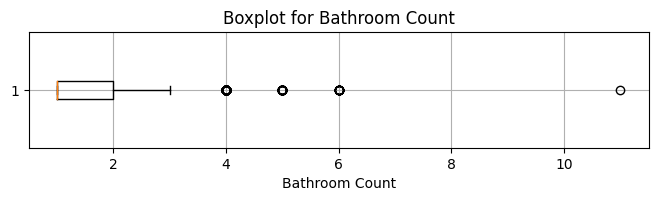

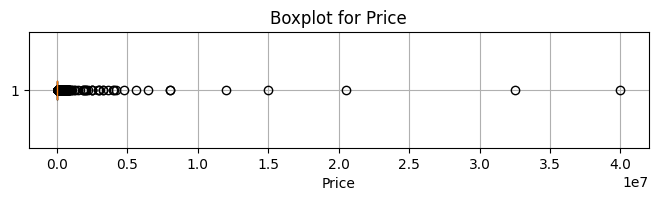

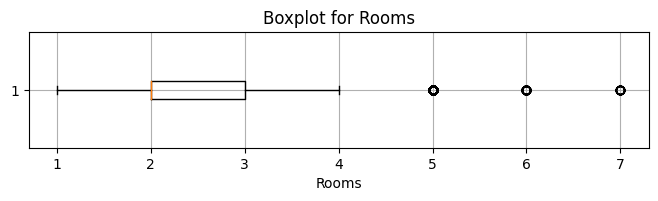

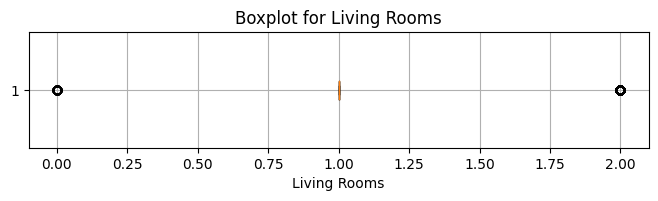

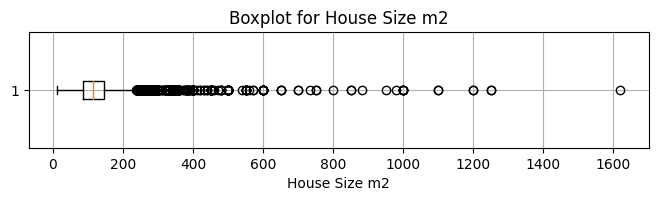

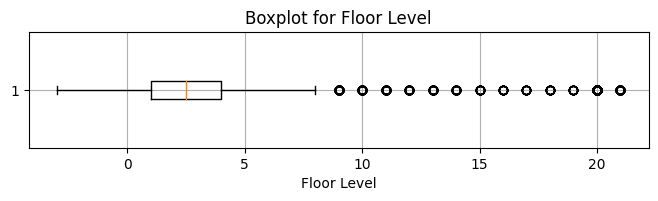

In [409]:
# Select only numerical columns for outlier detection
numerical_cols = [
    "Bathroom Count",
    "Price",
    "Rooms",
    "Living Rooms",
    "House Size m2",
    "Floor Level"
]

# Create boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 1.5))
    plt.boxplot(filtered_df[col].dropna(), vert=False)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()